In [3]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sbn

In [4]:
train_df = pd.read_csv("train_cleaned.csv")
test_df = pd.read_csv("test_x.csv")

<Axes: xlabel='Yıllık Ortalama Sipariş Verilen Ürün Adedi', ylabel='Yıllık Ortalama Sepete Atılan Ürün Adedi'>

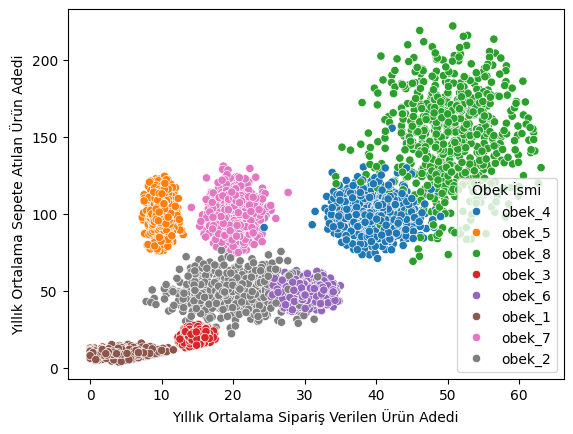

In [5]:
sbn.scatterplot(x="Yıllık Ortalama Sipariş Verilen Ürün Adedi",y="Yıllık Ortalama Sepete Atılan Ürün Adedi",data=train_df, hue="Öbek İsmi")

## Öbek'lerin Gelir/Harcama Grafiği

<Axes: xlabel='Yıllık Ortalama Gelir', ylabel='Yıllık Ortalama Satın Alım Miktarı'>

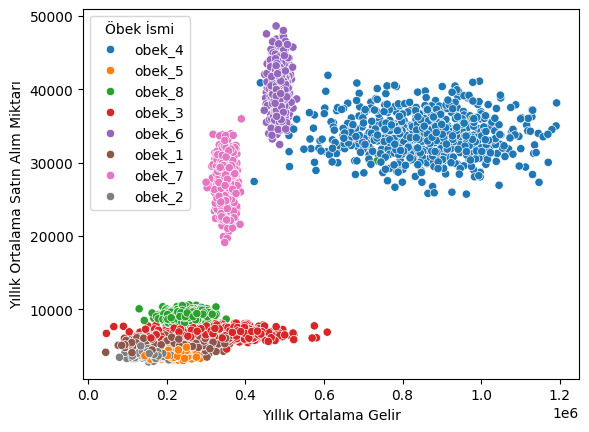

In [6]:
sbn.scatterplot(x="Yıllık Ortalama Gelir",y="Yıllık Ortalama Satın Alım Miktarı",data=train_df, hue="Öbek İsmi")

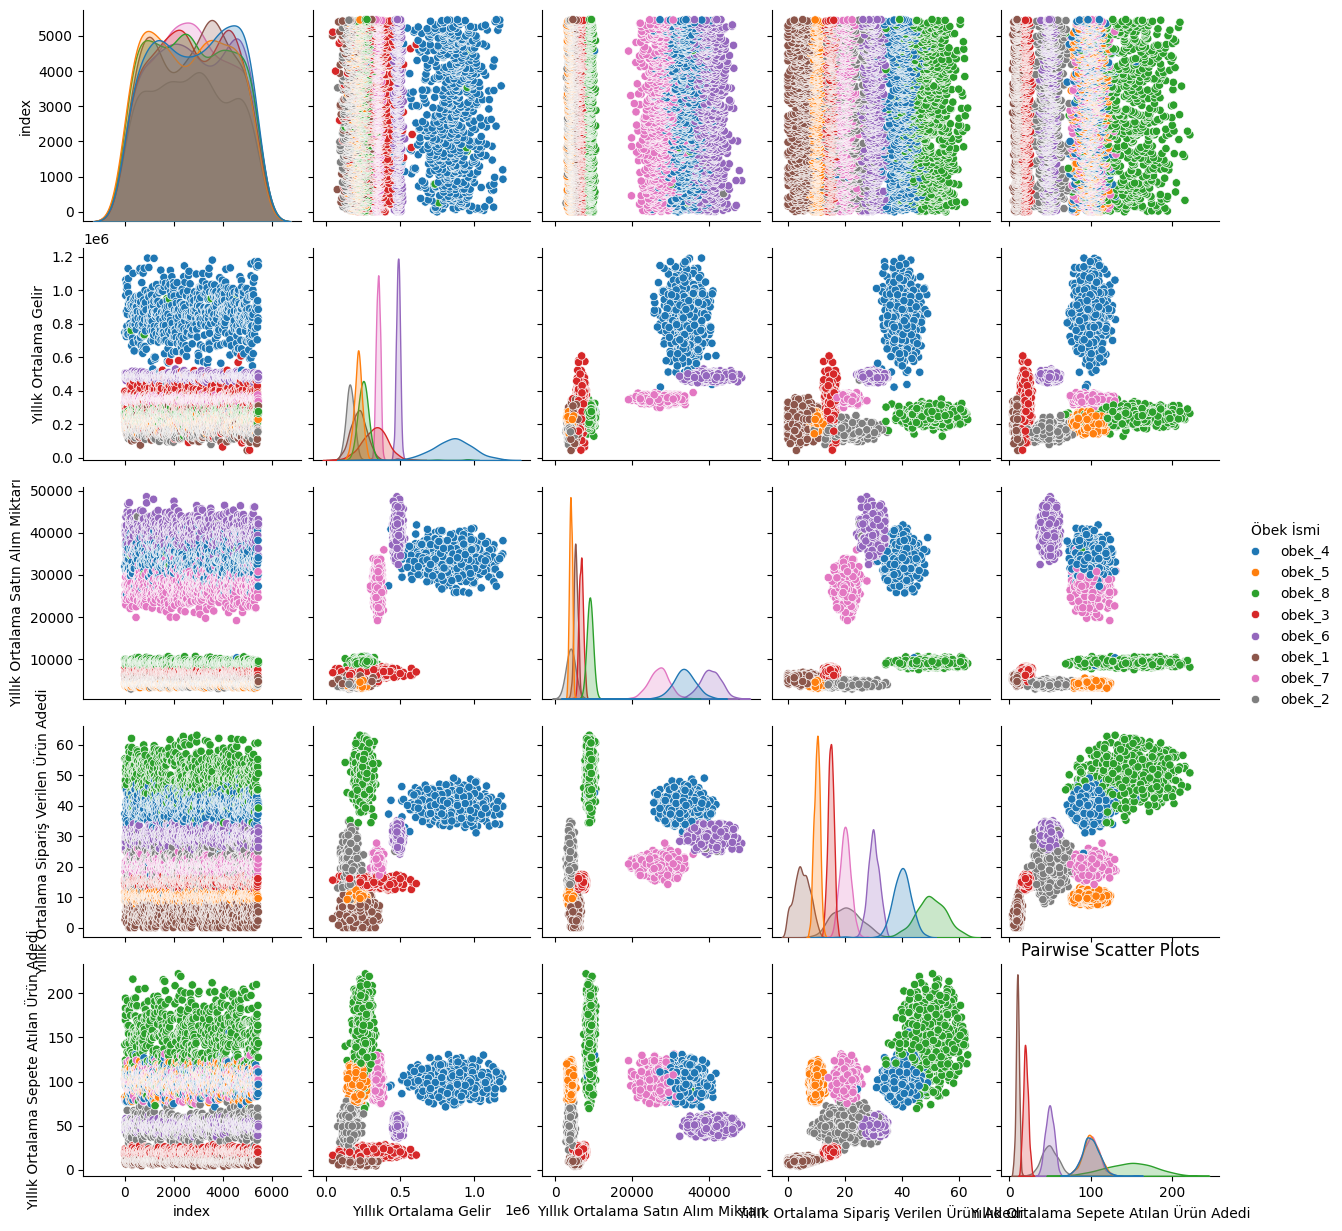

In [7]:
sbn.pairplot(train_df, hue='Öbek İsmi')
plt.title('Pairwise Scatter Plots')
plt.show()

In [8]:
train_df["Cinsiyet"] =train_df["Cinsiyet"].replace(["Erkek"],1)
train_df["Cinsiyet"] =train_df["Cinsiyet"].replace(["Kadın"],0)
train_df = pd.get_dummies(train_df, columns=['Yaş Grubu','Medeni Durum','Eğitim Düzeyi','Yaşadığı Şehir', 'İstihdam Durumu','Eğitime Devam Etme Durumu', 'En Çok İlgilendiği Ürün Grubu'])

C:\Users\tolgakilinckaya\AppData\Local\Temp\ipykernel_17236\1300819271.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df["Cinsiyet"] =train_df["Cinsiyet"].replace(["Kadın"],0)


In [9]:
test_df["Cinsiyet"] =test_df["Cinsiyet"].replace(["Erkek"],1)
test_df["Cinsiyet"] =test_df["Cinsiyet"].replace(["Kadın"],0)
test_df = pd.get_dummies(test_df, columns=['Yaş Grubu','Medeni Durum','Eğitim Düzeyi','Yaşadığı Şehir', 'İstihdam Durumu','Eğitime Devam Etme Durumu', 'En Çok İlgilendiği Ürün Grubu'])

C:\Users\tolgakilinckaya\AppData\Local\Temp\ipykernel_17236\4075067554.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df["Cinsiyet"] =test_df["Cinsiyet"].replace(["Kadın"],0)


In [10]:
X = train_df.drop("Öbek İsmi",axis=1)
X = X.drop("index",axis=1)
Y = train_df["Öbek İsmi"]

In [11]:
Y

0       obek_4
1       obek_5
2       obek_8
3       obek_3
4       obek_3
         ...  
5179    obek_6
5180    obek_6
5181    obek_1
5182    obek_8
5183    obek_8
Name: Öbek İsmi, Length: 5184, dtype: object

In [12]:
print(train_df.groupby(Y).size())

Öbek İsmi
obek_1    657
obek_2    519
obek_3    660
obek_4    684
obek_5    670
obek_6    653
obek_7    660
obek_8    681
dtype: int64


In [13]:
X

,Cinsiyet,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Yaş Grubu_18-30,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,...,İstihdam Durumu_Emekli,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Eğitime Devam Etme Durumu_Ediyor,Eğitime Devam Etme Durumu_Etmiyor,En Çok İlgilendiği Ürün Grubu_Elektronik ve Teknolojik Ürünler,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri
0,0,748266.440879,32010.900881,37.310644,102.936904,False,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
1,1,246298.609605,4145.729891,11.554851,82.176053,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
2,1,268582.732360,9924.379414,55.353236,141.661426,True,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
3,1,327721.837865,6417.780714,15.417239,17.097397,False,False,False,True,False,...,False,True,False,False,True,False,False,True,False,False
4,1,397431.626948,7886.663061,14.689837,20.470459,False,True,False,False,False,...,False,False,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5179,0,478054.247819,43182.299801,31.356284,51.600436,False,False,False,False,True,...,True,False,False,False,True,False,False,False,True,False
5180,1,481852.853651,42107.996193,26.288620,49.190536,False,False,False,True,False,...,False,True,False,False,True,False,True,False,False,False
5181,0,309443.687351,4655.392445,5.156906,9.537384,False,False,False,True,False,...,False,False,False,False,True,False,True,False,False,False
5182,0,266604.268016,9016.165906,39.205399,143.281718,True,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False


In [14]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

In [15]:
X

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.0,0.613265,0.637245,0.591447,0.453498,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.176206,0.028122,0.183167,0.358358,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.195609,0.154441,0.877458,0.630960,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.247101,0.077788,0.244394,0.060124,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.307797,0.109898,0.232863,0.075582,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5179,0.0,0.377994,0.881449,0.497059,0.218240,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5180,1.0,0.381301,0.857965,0.416726,0.207196,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5181,0.0,0.231186,0.039263,0.081747,0.025479,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5182,0.0,0.193886,0.134588,0.621483,0.638386,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [16]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Label encoding
encoder = LabelEncoder()
encoder.fit(Y)
Y_encoded = encoder.transform(Y)

# One-hot encoding (NumPy kullanarak)
Y_one_hot = np.eye(len(np.unique(Y)))[Y_encoded]

# Y_one_hot sonuçları
print(Y_one_hot)

Y = Y_one_hot

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [17]:
Y[0:10]

array([[0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.]])

In [18]:
X = X.values

In [19]:
# Create model here
model = Sequential()
model.add(Dense(32, input_dim = 36, activation = 'relu')) # Rectified Linear Unit Activation Function
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(8, activation = 'softmax')) # Softmax for multi-class classification
# Compile model here
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [20]:
model.fit(X,Y,epochs=200)

Epoch 1/200
162/162 [==============================] - 1s 1ms/step - loss: 1.3813 - accuracy: 0.5176
Epoch 2/200
162/162 [==============================] - 0s 898us/step - loss: 0.4617 - accuracy: 0.8503
Epoch 3/200
162/162 [==============================] - 0s 885us/step - loss: 0.2294 - accuracy: 0.9390
Epoch 4/200
162/162 [==============================] - 0s 868us/step - loss: 0.1323 - accuracy: 0.9676
Epoch 5/200
162/162 [==============================] - 0s 830us/step - loss: 0.0919 - accuracy: 0.9811
Epoch 6/200
162/162 [==============================] - 0s 1ms/step - loss: 0.0710 - accuracy: 0.9880
Epoch 7/200
162/162 [==============================] - 0s 922us/step - loss: 0.0588 - accuracy: 0.9884
Epoch 8/200
162/162 [==============================] - 0s 840us/step - loss: 0.0506 - accuracy: 0.9911
Epoch 9/200
162/162 [==============================] - 0s 849us/step - loss: 0.0462 - accuracy: 0.9923
Epoch 10/200
162/162 [==============================] - 0s 823us/step - loss:

In [21]:
loss = pd.DataFrame(model.history.history)

<Axes: >

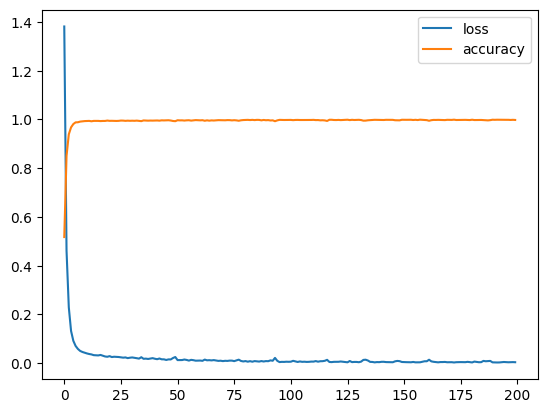

In [22]:
loss.plot()

In [23]:
model.evaluate(X,Y,verbose=0)

[0.003144760150462389, 0.9986497163772583]

In [24]:
test_df = test_df.drop("index",axis=1)

In [25]:
test_df

,Cinsiyet,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Yaş Grubu_18-30,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,...,İstihdam Durumu_Emekli,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Eğitime Devam Etme Durumu_Ediyor,Eğitime Devam Etme Durumu_Etmiyor,En Çok İlgilendiği Ürün Grubu_Elektronik ve Teknolojik Ürünler,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri
0,1,365331.930346,5566.587664,15.442635,19.646460,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
1,1,414899.236174,6756.766203,14.957246,19.675863,False,False,True,False,False,...,False,False,True,False,True,False,False,False,False,True
2,0,152825.872271,4493.915682,10.907930,46.904518,False,False,False,False,True,...,False,False,True,False,True,False,False,True,False,False
3,0,489052.908472,42670.646595,32.333021,48.083609,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
4,1,323635.711534,5959.266948,4.519968,12.752491,True,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,0,259190.078834,9559.156534,41.883661,117.627785,True,False,False,False,False,...,False,True,False,True,False,False,True,False,False,False
2336,0,194580.563177,4070.232154,20.082996,45.659622,False,True,False,False,False,...,False,False,True,False,True,False,True,False,False,False
2337,1,357730.521969,22589.204381,18.922305,100.691379,False,False,False,False,True,...,False,False,False,False,True,False,True,False,False,False
2338,1,213179.637202,4205.390562,10.758108,97.778913,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True


In [26]:
test_df = scaler.fit_transform(test_df)
test_df = pd.DataFrame(test_df)
test_df = test_df.values

In [27]:
test_df[0:3]

array([[1.        , 0.24781464, 0.06196133, 0.2412253 , 0.06177956,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [1.        , 0.29096383, 0.08931554, 0.23364316, 0.06190604,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ],
      

In [28]:
testSonuclari = model.predict(test_df)

74/74 [==============================] - 0s 782us/step


In [29]:
testSonuclari[0:10]

array([[5.62792184e-06, 2.60910973e-08, 9.99994397e-01, 3.01943806e-29,
        3.88894366e-22, 3.25922102e-11, 2.38023941e-11, 3.16162729e-30],
       [4.71794692e-09, 2.68493450e-10, 1.00000000e+00, 5.18033676e-24,
        9.53307343e-25, 7.77457699e-12, 4.35093517e-14, 3.09412972e-27],
       [1.96886840e-09, 1.00000000e+00, 1.07658917e-10, 2.44707306e-17,
        1.33921860e-10, 2.55956255e-19, 1.68908195e-15, 9.80458020e-20],
       [9.70875810e-12, 3.47047026e-05, 2.79136572e-07, 1.38340994e-16,
        3.37738026e-21, 9.99959350e-01, 5.71620103e-06, 8.89343171e-20],
       [9.99999762e-01, 5.91349615e-14, 2.32326983e-07, 0.00000000e+00,
        1.57512281e-24, 1.21480197e-20, 2.52238026e-19, 0.00000000e+00],
       [1.92263191e-28, 9.99999881e-01, 2.28011476e-16, 2.04369854e-12,
        1.11220546e-17, 3.94970354e-25, 7.09216981e-16, 9.38643012e-08],
       [1.00000000e+00, 7.92914488e-15, 5.91887477e-12, 1.16136397e-34,
        2.84902618e-24, 2.45681560e-20, 1.91273936e-23, 0.

In [30]:
import tensorflow as tf

In [31]:
decodedTestSonuclari = tf.argmax(testSonuclari,axis=1).numpy()

In [32]:
decodedTestSonuclari = decodedTestSonuclari.astype(object)

In [33]:
decodedTestSonuclari[0:20]

array([2, 2, 1, 5, 0, 1, 0, 7, 6, 7, 5, 6, 7, 3, 3, 7, 6, 7, 3, 6],
      dtype=object)

In [34]:
decodedTestSonuclari[decodedTestSonuclari == 0] = 'obek_1'
decodedTestSonuclari[decodedTestSonuclari == 1] = 'obek_2'
decodedTestSonuclari[decodedTestSonuclari == 2] = 'obek_3'
decodedTestSonuclari[decodedTestSonuclari == 3] = 'obek_4'
decodedTestSonuclari[decodedTestSonuclari == 4] = 'obek_5'
decodedTestSonuclari[decodedTestSonuclari == 5] = 'obek_6'
decodedTestSonuclari[decodedTestSonuclari == 6] = 'obek_7'
decodedTestSonuclari[decodedTestSonuclari == 7] = 'obek_8'

In [35]:
veri = {
    'id': range(2340),
    'Öbek İsmi': decodedTestSonuclari
}
Tahmin_Dataframe = pd.DataFrame(veri)
Tahmin_Dataframe.set_index('id', inplace=True)
Tahmin_Dataframe

,Öbek İsmi
id,
0,obek_3
1,obek_3
2,obek_2
3,obek_6
4,obek_1
...,...
2335,obek_8
2336,obek_2
2337,obek_7


In [36]:
Tahmin_Dataframe.to_csv('submission.csv')